In [1]:
import sys 
sys.path.append('/home/kelcey/hera/Washington/uwchamp2017/fits_functions')
sys.path.append('/home/kelcey/hera/Washington/uwchamp2017')

#import importlib.util
#spec = importlib.util.spec_from_file_location("spec_calcs", "/home/kelcey/hera/Washington/uwchamp2017/clusterer.py")

#spec_calcs = importlib.util.module_from_spec(spec)
#spec.loader.exec_module(spec_calcs)

import clusterer as clst
import fits_functions as ff

/home/kelcey/anaconda3/envs/py27/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from astropy import units as u
import glob
import pandas as pd
from astropy import units as u
from astropy.coordinates import SkyCoord
from pylab import *
from astropy.table import Table
from astropy.coordinates import match_coordinates_sky

This is a quick walkthrough of how to view the contours of an extended object (EO) from FHD data
on top of images of the same object from TGSS or NVSS. We start with an IDL .sav
file like this: 

'new_source_arrays/1130788624_source_array.sav'

This can be opened using clst.collector; see its documentation for information about this function.

In [3]:
data = clst.collector('/home/kelcey/hera/Washington/uwchamp2017/1130773144_source_array.sav')

# downloadTGSS

From here, data can be put into these functions to be plotted. We still need the
images from TGSS or NVSS to compare it with. To do this, we plug data and the
object ID into the function downloadTGSS. We will use EO ID 32770 for this example.

In [4]:
data

{'data': [{'source_array': rec.array([(32769, 1230.3986 , 1071.8334 , 50.40629 , -37.14988 , 1.0313290e+04, 182.43523, -0.79999924, 1., 0, rec.array([(32769, 1229.1859, 1071.7485, 50.32079 , -37.162556, 0., 182.43501, -0.8, 0.1, 0, None, rec.array([(0.23282537, 0.25499895, 0.00647642+0.j, 0.00647678+0.j, 1.4703797, 0., 0., 0.)],
             dtype=[(('xx', 'XX'), '>f4'), (('yy', 'YY'), '>f4'), (('xy', 'XY'), '>c8'), (('yx', 'YX'), '>c8'), (('i', 'I'), '>f4'), (('q', 'Q'), '>f4'), (('u', 'U'), '>f4'), (('v', 'V'), '>f4')])),
              (32769, 1229.1833, 1071.7672, 50.320404, -37.16155 , 0., 182.43501, -0.8, 0.1, 0, None, rec.array([(0.21357521, 0.2339155, 0.00594095+0.j, 0.00594128+0.j, 1.3488078, 0., 0., 0.)],
             dtype=[(('xx', 'XX'), '>f4'), (('yy', 'YY'), '>f4'), (('xy', 'XY'), '>c8'), (('yx', 'YX'), '>c8'), (('i', 'I'), '>f4'), (('q', 'Q'), '>f4'), (('u', 'U'), '>f4'), (('v', 'V'), '>f4')])),
              (32769, 1229.8564, 1070.7148, 50.37978 , -37.21474 , 0., 182.43

In [5]:
fitsTGSS = ff.downloadTGSS(data,32770)

print fitsTGSS

EOID32770_RA50.9784660339_DEC-37.2810325623_TGSS.fits


# contourFits

We are now ready to plot the ocntours of our EO on top of the TGSS
image of it! All you need to do is run contourFits, like this:

/home/kelcey/anaconda3/envs/py27/lib/python2.7/site-packages/aplpy/labels.py:432: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if self.coord == x or self.axis.apl_tick_positions_world[ipos] > 0:


INFO: Auto-setting vmax to  1.010e-01 [aplpy.core]
32770_contours_TGSS.png


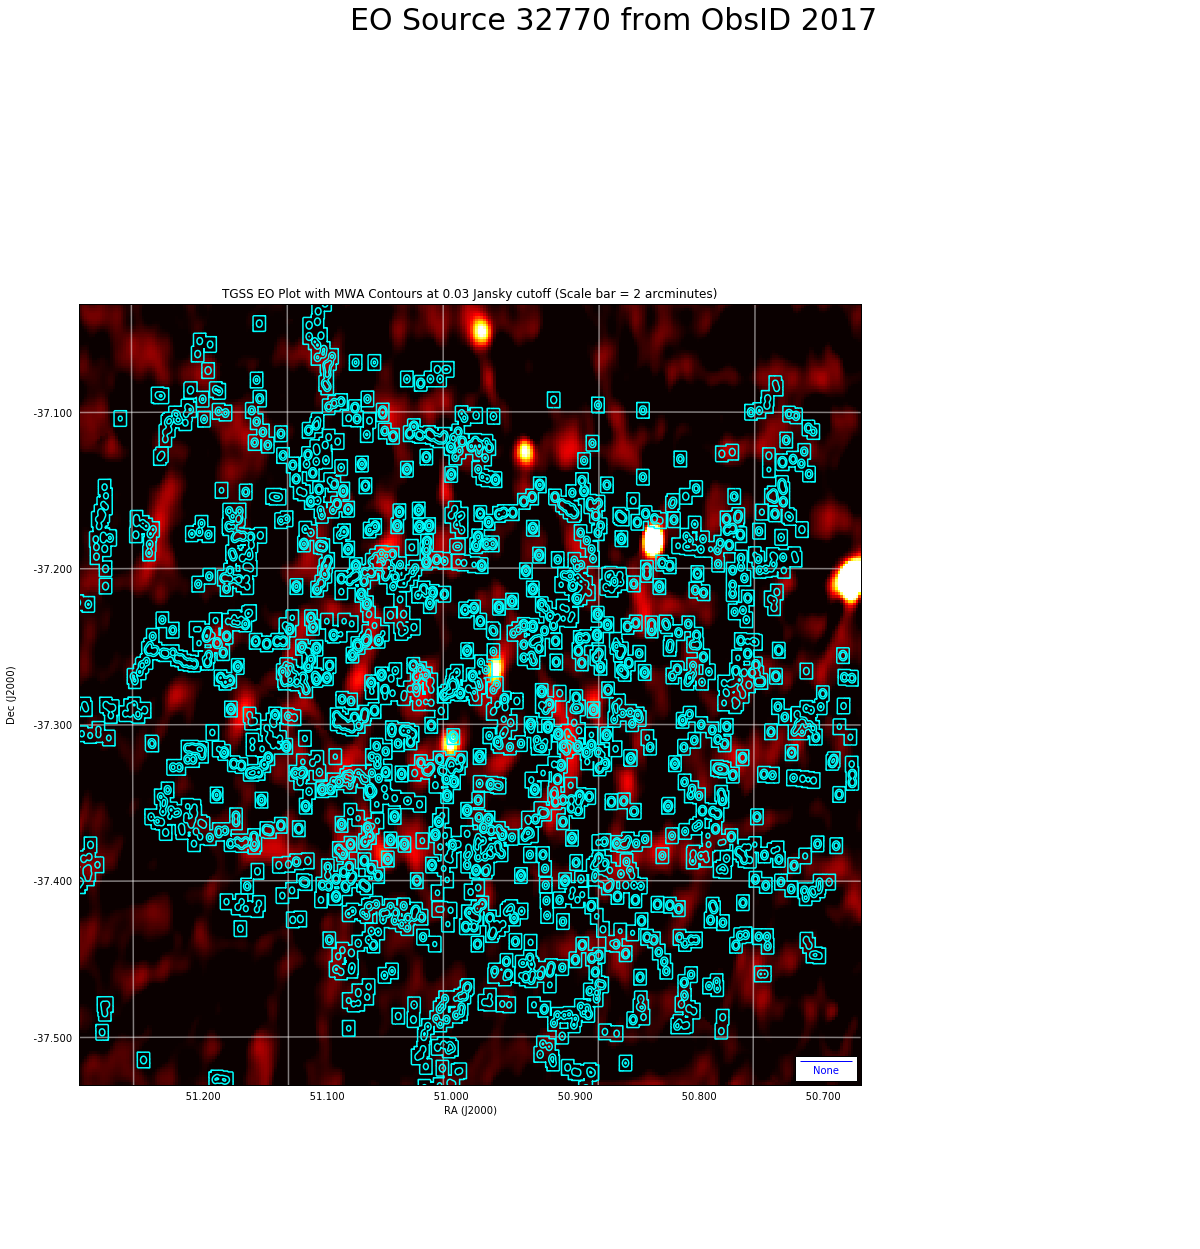

In [6]:
contourFileTGSS = ff.contourFits(data,fitsTGSS,32770,'32770_contours_TGSS.png')

print contourFileTGSS

Congratulations! You now have a .png file of this image. 

Now, lets check this object against NVSS. To do this, simply run downloadTGSS
as you did before, but include the argument NVSS=True, to get the FITS image 
file. From there, run contourFile with this FITS file.



EOID32770_RA50.9784660339_DEC-37.2810325623_NVSS.fits
INFO: Auto-setting vmax to  2.379e-02 [aplpy.core]



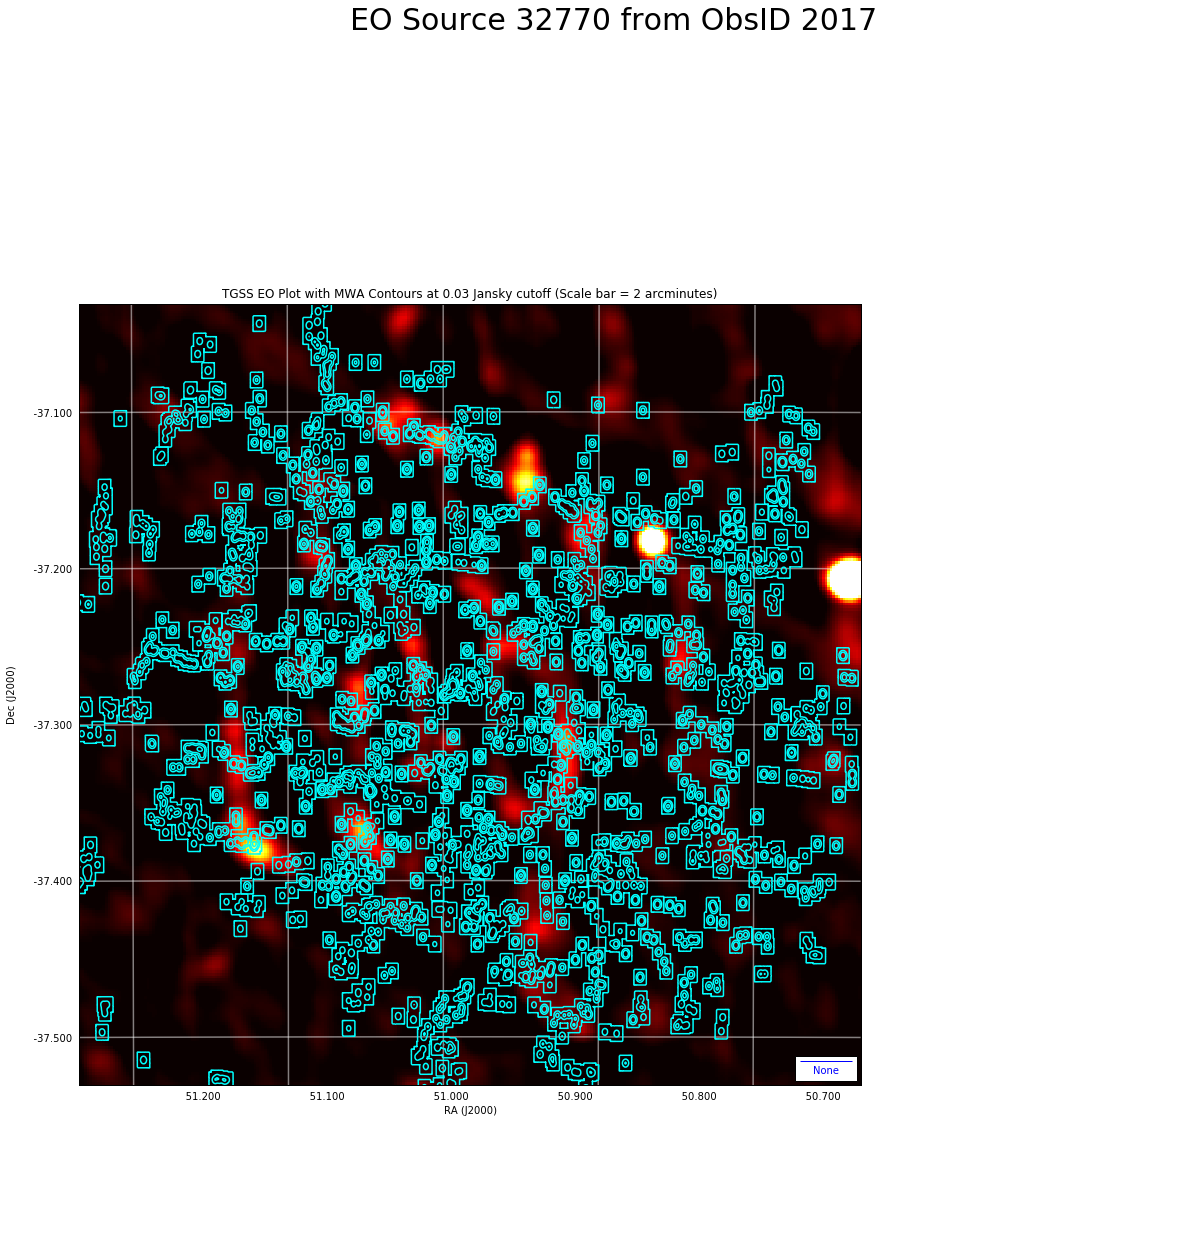

In [7]:
fitsNVSS = ff.downloadTGSS(data,32770,NVSS=True,)
print fitsNVSS

contourFileNVSS = ff.contourFits(data,fitsNVSS,32770,'32770_contours_NVSS.png')
print 

If you want to see the plots when clustering has been applied to the file,
then include the argument cluster=True. The default flux cutoff for this is 
0.03 janskies, but if you would like to change this value (to 0.02 janskies,
for example), then include the argument cutoff=0.02.

In [16]:
contourFileTGSScutoff = ff.contourFits(data,fitsTGSS,32770,
                                       '32770_contours_TGSS_cutoff.png',cluster=True,cutoff=0.02)

AttributeError: 'module' object has no attribute 'modeler'

# getFits

Last function! If you want to make a binary FITS file out of data that has had some clustering
done to it, use getFits. First, make a list of all of the EOids of the EO's that you would like 
clustered:

In [13]:
EOlist = [32770,32772,32808]

Now plug this in to the argument EOidList

In [18]:
someCutsFits = ff.getFits(data,EOidList=EOlist,filename='practice.FITS')

AttributeError: 'module' object has no attribute 'modeler'

# Start of Kelcey's Work

INFO: Auto-setting vmax to  1.010e-01 [aplpy.core]


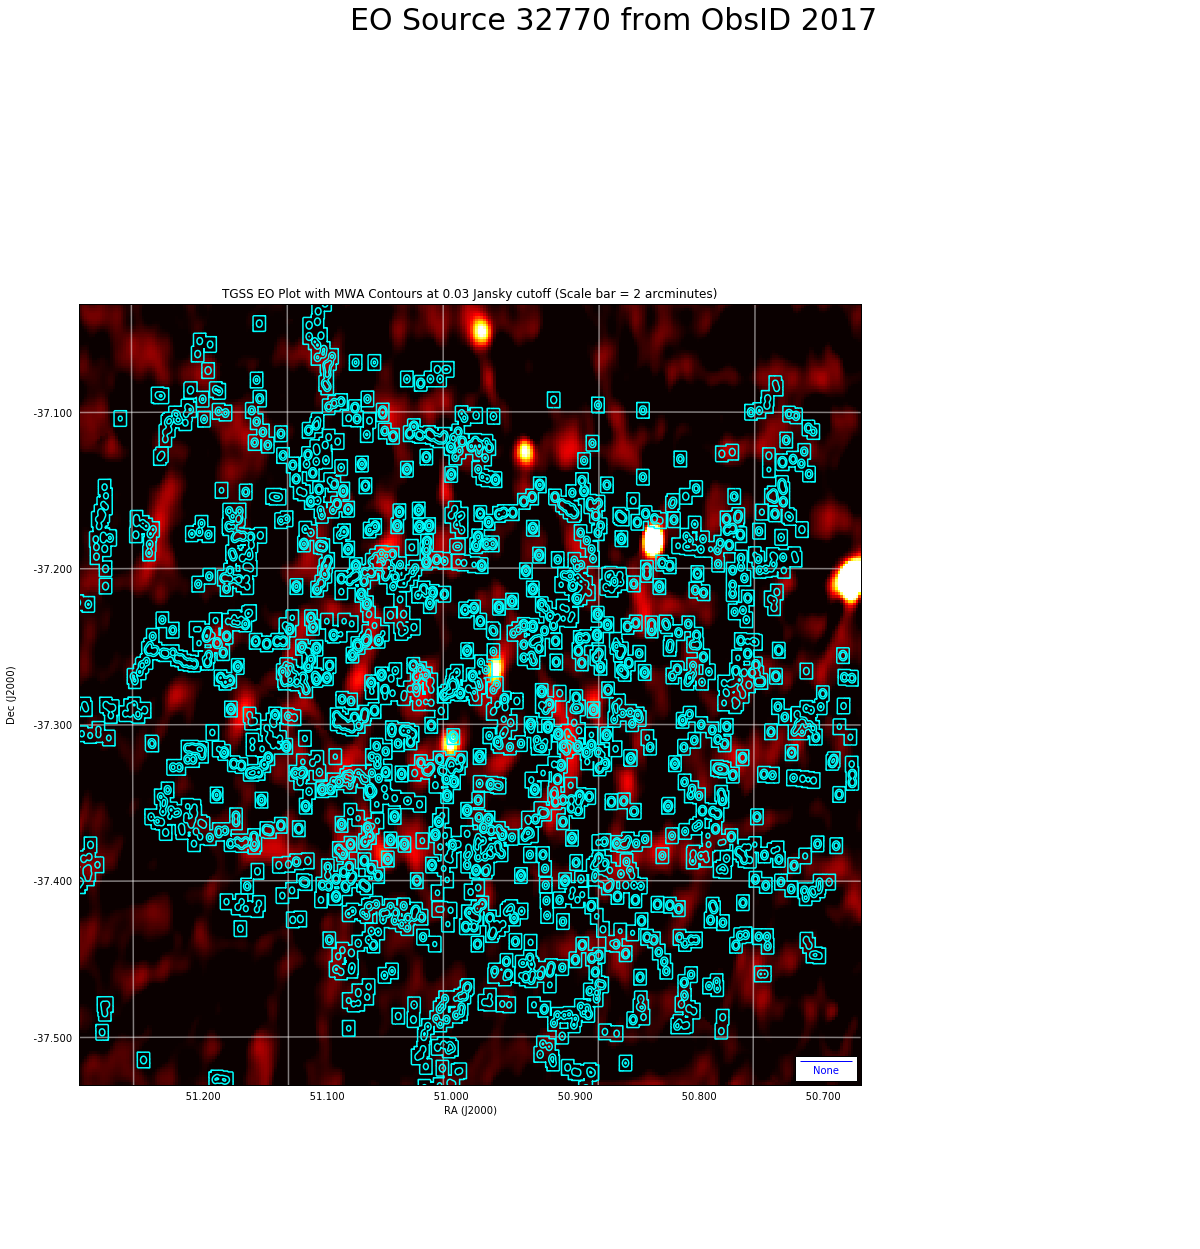

In [14]:
contourFileTGSScutoff = ff.contourFits(data,fitsTGSS,32770,
                                       '32770_contours_TGSS_cutoff.png',cluster=False,cutoff=0.02)
#This code would not run because it called a function 'modeler' that does not exist. Setting cluster to False 
#is the only way to get ff.contourFits to run.

In [20]:
someCutsFits = ff.getFits(data,EOidList=EOlist,filename='practice.FITS')
#Since clst.modler is necessary for this function to run, it will not run unless we find out where
#to find clst.modler

AttributeError: 'module' object has no attribute 'modeler'

In [8]:
path = '/home/kelcey/hera/Washington/uwchamp2017/1130773144_source_array.sav'
sep = clst.separator(data)
#This function seperates the data into point sources and extended sources

In [9]:
points = sep['psources']
exts = sep['extsources']
#Defining two lists for the point sources and extended sources

In [10]:
points_seek = clst.seeker(points)
#Can't use this function on data that has already been separated

TypeError: list indices must be integers, not str

### Using clst.seeker
This is a very useful function in analyzing .sav files. Arrays begining with 'point' represent the higher level sources while 'EO' arrays are lower level sources, containing information about the smaller pieces that that make up the highere level points

In [11]:
data_seek = clst.seeker(data)

In [12]:
data_seek.keys()

['point_sources_DEC',
 'all_YY',
 'point_sources_YX',
 'EO_sources_Q',
 'point_sources_ID',
 'EO_sources_I',
 'point_sources_STON',
 'all_DEC',
 'EO_sources_DEC',
 'EO_sources_FREQ',
 'EO_sources_YX',
 'EO_sources_YY',
 'all_BEAM',
 'all_I',
 'point_sources_RA',
 'all_XX',
 'EO_sources_ALPHA',
 'point_sources_V',
 'point_sources_U',
 'EO_sources_FLAG',
 'EO_sources_XX',
 'EO_sources_X',
 'point_sources_Q',
 'point_sources_ALPHA',
 'point_sources_XX',
 'point_sources_XY',
 'point_sources_YY',
 'point_sources_GAIN',
 'EO_sources_RA',
 'point_sources_Y',
 'point_sources_X',
 'EO_sources_V',
 'point_sources_FREQ',
 'all_RA',
 'EO_sources_Y',
 'EO_sources_ID',
 'EO_sources_GAIN',
 'EO_sources_U',
 'point_sources_FLAG',
 'EO_sources_XY',
 'point_sources_I',
 'EO_sources_STON']

### Brights
The clst.chaser function identifies the brightest source in a given data set and returns useful information about it.

In [13]:
brights = clst.chaser(data_seek['EO_sources_ID'], data_seek['EO_sources_X'], data_seek['EO_sources_Y'],
           data_seek['EO_sources_RA'], data_seek['EO_sources_DEC'], data_seek['EO_sources_STON'], 
           data_seek['EO_sources_FREQ'], data_seek['EO_sources_ALPHA'], data_seek['EO_sources_GAIN'],
           data_seek['EO_sources_FLAG'], data_seek['EO_sources_XX'], data_seek['EO_sources_YY'],
           data_seek['EO_sources_XY'], data_seek['EO_sources_YX'], data_seek['EO_sources_I'],
           data_seek['EO_sources_Q'], data_seek['EO_sources_U'], data_seek['EO_sources_V'], 
                      radius = 1)

In [14]:
brights
#This represents the brightest source within a set of data.

{'brightest_ALPHA': [-0.8],
 'brightest_DEC': [-37.162556],
 'brightest_FLAG': [0],
 'brightest_FREQ': [182.43501],
 'brightest_GAIN': [0.1],
 'brightest_I': [1.4703797],
 'brightest_ID': [32769],
 'brightest_Q': [0.0],
 'brightest_RA': [50.32079],
 'brightest_STON': [0.0],
 'brightest_U': [0.0],
 'brightest_V': [0.0],
 'brightest_X': [1229.1859],
 'brightest_XX': [0.23282537],
 'brightest_XY': [(0.006476422+0j)],
 'brightest_Y': [1071.7485],
 'brightest_YX': [(0.0064767767+0j)],
 'brightest_YY': [0.25499895],
 'brightest_indices': [0]}

Adding some stuff to make the plots nicer

In [15]:
plt.rcParams['figure.figsize'] = (10, 7)
plt.rc('axes', labelsize=14)
plt.rc('axes', labelweight='bold')
plt.rc('axes', titlesize=16)
plt.rc('axes', titleweight='bold')
plt.rc('font', family='sans-serif')
plt.rcParams['errorbar.capsize'] = 3
opts = {'mec':'k', 'mew': 0.5, 'lw': 1}

Below is a plot of one of the sets of points that make up a higher level point source. The first plot shows I-band magnitudes with color while the second illustrates them with size.

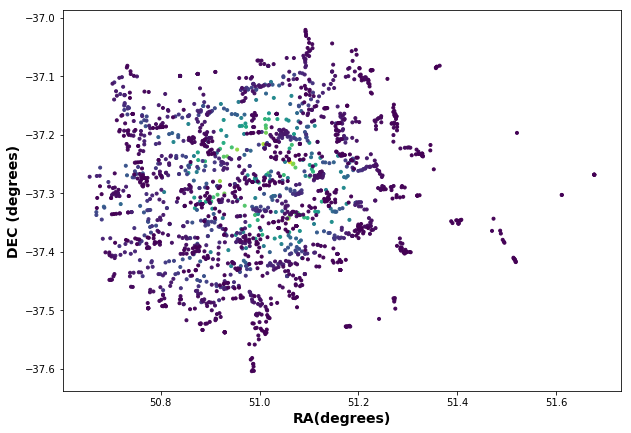

In [16]:
RA = np.array(data_seek['EO_sources_RA'])
DEC = np.array(data_seek['EO_sources_DEC'])
I = np.array(data_seek['EO_sources_I'])
ID = np.array(data_seek['point_sources_ID'])
plt.scatter(RA[:, 1][0], DEC[:, 1][0], c = I[:, 1][0], marker = '.' )
plt.xlabel('RA(degrees)')
plt.ylabel('DEC (degrees)');

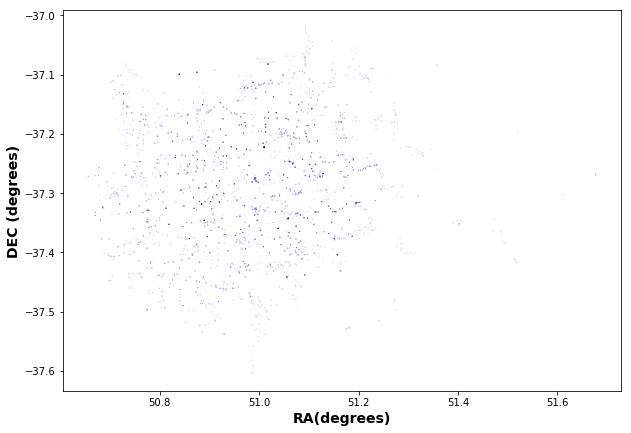

In [17]:
RA = np.array(data_seek['EO_sources_RA'])
DEC = np.array(data_seek['EO_sources_DEC'])
I = np.array(data_seek['EO_sources_I'])
plt.scatter(RA[:, 1][0], DEC[:, 1][0], s = I[:, 1][0], marker = '.', color = 'b' )
plt.xlabel('RA(degrees)')
plt.ylabel('DEC (degrees)');

Below are two plots of one set of data. One shows the I-band magnitudes with color and the other shows them with size. It is difficult to distinguish much about the first plot. The second plot is nice but could be better if we could see individual sources.

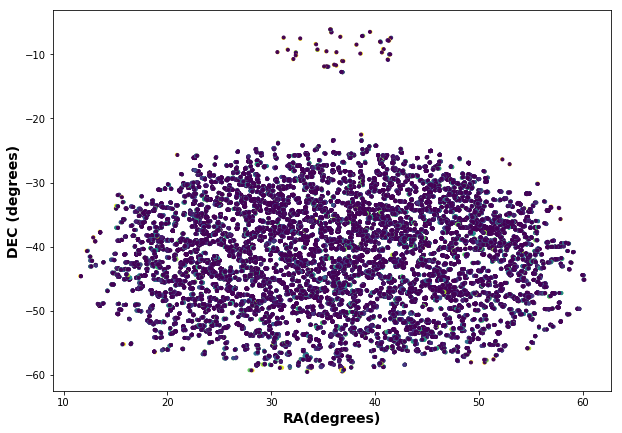

In [18]:
RA = np.array(data_seek['EO_sources_RA'])
DEC = np.array(data_seek['EO_sources_DEC'])
I = np.array(data_seek['EO_sources_I'])

for i in range (0, RA.shape[1]):
    plt.scatter(RA[:, i][0], DEC[:, i][0], c = I[:, i][0], marker = '.')
    plt.xlabel('RA(degrees)')
    plt.ylabel('DEC (degrees)');

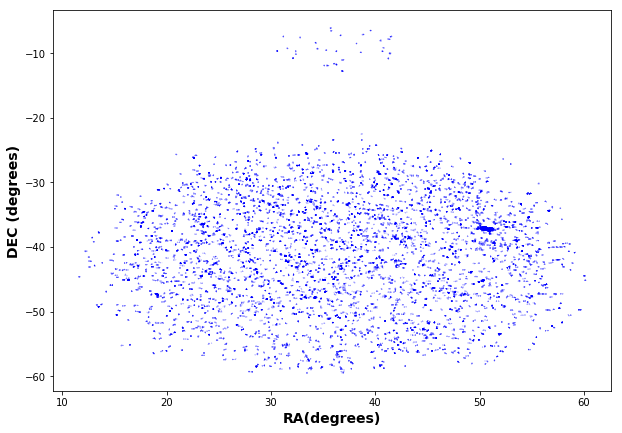

In [19]:
RA = np.array(data_seek['EO_sources_RA'])
DEC = np.array(data_seek['EO_sources_DEC'])
I = np.array(data_seek['EO_sources_I'])

for i in range (0, RA.shape[1]):
    plt.scatter(RA[:, i][0], DEC[:, i][0], s = I[:, i][0], marker = '.', color = 'b' )
    plt.xlabel('RA(degrees)')
    plt.ylabel('DEC (degrees)');

To improve these data plots, we will keep the I-band magnitudes proportional to the shape of the markers but we will add color. An array of the same length as the data is created containing random colors. A random color is then assigned to each point source and the point sources are graphed along with their components.

In [41]:
RA = np.array(data_seek['EO_sources_RA'])
DEC = np.array(data_seek['EO_sources_DEC'])
I = np.array(data_seek['EO_sources_I'])
RA.shape[1]

2807

In [87]:
cols = ['gray', 'silver', 'rosybrown', 'firebrick', 'red', 'darksalmon', 'sienna', 'sandybrown', 'tan', 
       'gold', 'darkkhaki', 'olivedrab', 'chartreuse', 'darkgreen', 'seagreen', 'mediumspringgreen',
       'lightseagreen', 'darkcyan', 'darkturquoise', 'deepskyblue', 'slategray', 'royalblue', 'navy', 
       'blue', 'mediumpurple', 'darkorchid', 'm', 'mediumvioletred', 'palevioletred', 'lightcoral', 
       'maroon', 'coral', 'peachpuff', 'darkorange', 'orange', 'darkgoldenrod', 'olive', 'yellowgreen',
       'lawngreen', 'lightgreen', 'g', 'mediumseagreen', 'darkslategrey', 'cadetblue', 'skyblue', 
       'dodgerblue', 'darkblue', 'slateblue', 'rebeccapurple', 'darkviolet', 'violet', 'fuchia', 'deeppink', 
       'crimson', 'indianred', 'darkred', 'salmon', 'orangered', 'chocolate', 'peru', 'burlywood', 
       'goldenrod', 'y', 'darkolivegreen', 'forestgreen', 'springgreen', 'aquamarine', 'aqua', 'powderblue', 
       'lightskyblue', 'lightslategray', 'lavender', 'mediumblue', 'blueviolet', 'mediumorchid', 'hotpink', 
       'pink']
c_rand = np.random.choice(colors, RA.shape[1])

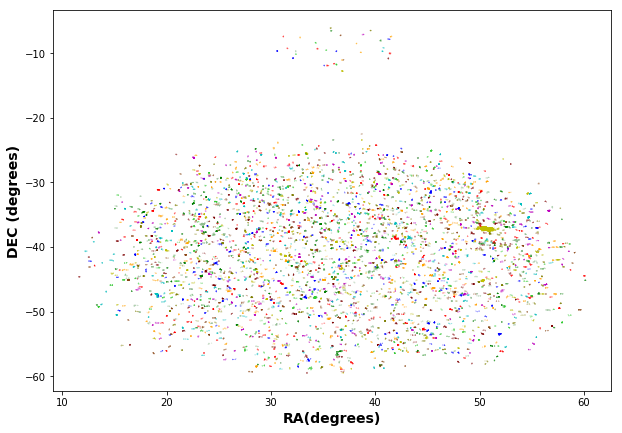

In [24]:
RA = np.array(data_seek['EO_sources_RA'])
DEC = np.array(data_seek['EO_sources_DEC'])
I = np.array(data_seek['EO_sources_I'])
for i in range (0, RA.shape[1]):
    plt.scatter(RA[:, i][0], DEC[:, i][0], s = I[:, i][0], marker = '.', color = c_rand[i] )
    plt.xlabel('RA(degrees)')
    plt.ylabel('DEC (degrees)');

This plot is much easier to understand. There is one source that is clearly brighter than the others. We zoom in on this below to see the individual point sources that make up this bright object. Here, the I-band magnitude differences are more obvious and we can get a better look at the source.

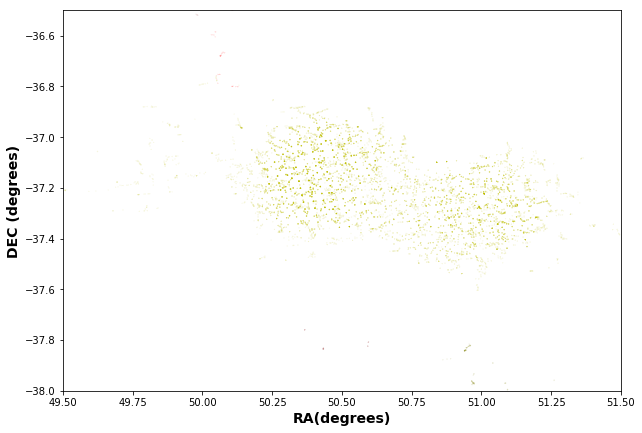

In [25]:
RA = np.array(data_seek['EO_sources_RA'])
DEC = np.array(data_seek['EO_sources_DEC'])
I = np.array(data_seek['EO_sources_I'])
for i in range (0, RA.shape[1]):
    plt.scatter(RA[:, i][0], DEC[:, i][0], s = I[:, i][0], marker = '.', color = c_rand[i] )
plt.xlabel('RA(degrees)')
plt.ylabel('DEC (degrees)')
plt.xlim(49.5, 51.5)
plt.ylim(-38, -36.5);

Just creating a function to do this for every data set in a directory

In [67]:
def create_radio_sky(directory):
    """

    Creates a graph of the radio sky for each given file in a directory

    """
    plt.rcParams['figure.figsize'] = (10, 10)
    plt.rc('axes', labelsize=14)
    plt.rc('axes', labelweight='bold')
    plt.rc('axes', titlesize=16)
    plt.rc('axes', titleweight='bold')
    plt.rc('font', family='sans-serif')

    paths = glob.glob(directory + '*.sav')
    n = 0
    for path in paths[0:4]:
        data = clst.collector(path)
        data_seek = clst.seeker(data)
        
        RA = np.array(data_seek['EO_sources_RA'])
        DEC = np.array(data_seek['EO_sources_DEC'])
        I = np.array(data_seek['EO_sources_I'])

        colors = ['r', 'y', 'm', 'g', 'c', 'b', 'orange', 'maroon', 'limegreen', 
                  'saddlebrown', 'darkseagreen', 'darkviolet', 'indigo']
        c_rand = np.random.choice(colors, RA.shape[1])
        plt.figure()
        #n = n+1
        #plt.subplot(100 + n)
        for i in range (0, RA.shape[1]):
            plt.scatter(RA[:, i][0], DEC[:, i][0], s = I[:, i][0], marker = '.', color = c_rand[i] )
            plt.xlabel('RA(degrees)')
            plt.ylabel('DEC (degrees)');
    return

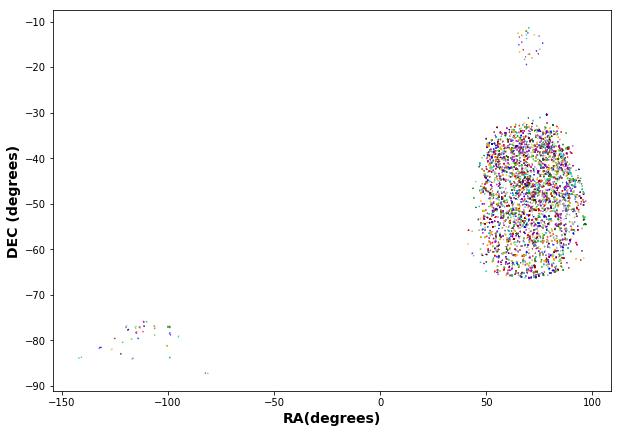

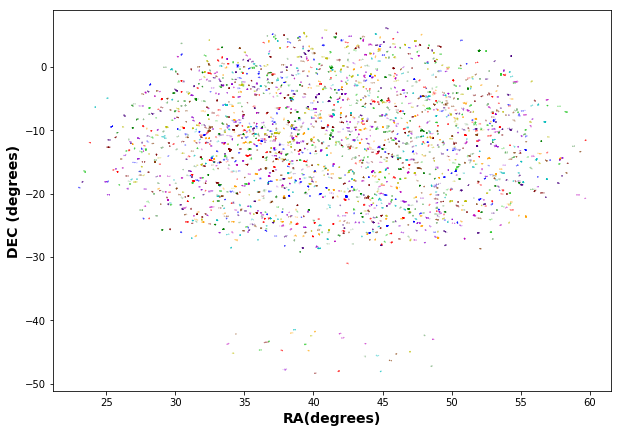

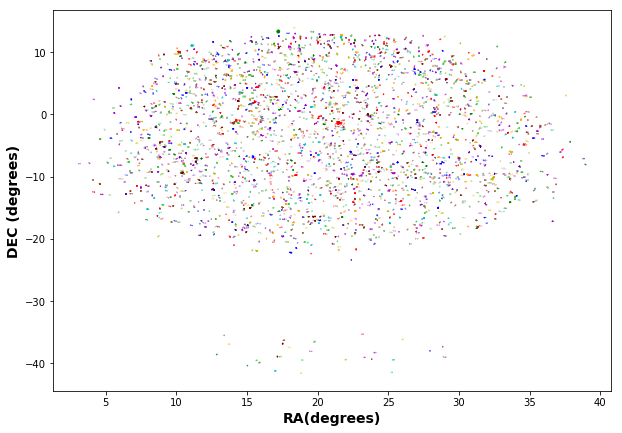

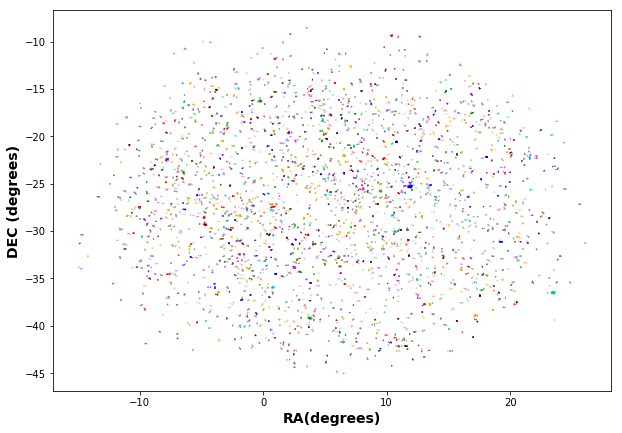

In [68]:
directory = '/home/kelcey/hera/Washington/uwashchamp2019/source_array_data/'

create_radio_sky(directory)

# Matching
We want to find a way to identify these individula sources throughout many sets of data. Below we match every data set in a given directory with one of the individual datum, specified by it's index. This is not the most efficient approach.

In [104]:
def table_match(directory, index):
    """
    Matches every image in a given directory and returns a Data Frame with the Ra, Dec, and 
    Magnitudes of each object in the images
    
    Directory is an absolute path to a directory containing the images
    
    index is the index of the image the rest of the images will be compared to
    
    """
    
    i = 0
    
    paths = glob.glob(directory + '*.sav')
    data0 = clst.collector(paths[index])
    data_seek0 = clst.seeker(data0)
    
    ra0 = np.array(data_seek0['EO_sources_RA'])[:][0]
    
    dec0 = np.array(data_seek0['EO_sources_DEC'])[:][0]
    
    mag0 = np.array(data_seek0['EO_sources_I'])[:][0]
    
    n=0
    df0 = pd.DataFrame({'RA': ra0[i],'Mag {}'.format(n): mag0[i],  'DEC' : dec0[i]})
    
    for path in paths[0:3]:
        data = clst.collector(path)
        data_seek = clst.seeker(data)
        
        n = n + 1
        data = clst.collector(path)
        data_seek = clst.seeker(data)
        
        ra = np.array(data_seek0['EO_sources_RA'])[:][0]
      
        dec = np.array(data_seek0['EO_sources_DEC'])[:][0]
       
        mag = np.array(data_seek0['EO_sources_I'])[:][0]


        catalog = SkyCoord(ra=ra[i]*u.deg, dec=dec[i]*u.deg)  
        c = SkyCoord(ra=ra0[i]*u.deg, dec=dec0[i]*u.deg)  
        idx, d2d, d3d = c.match_to_catalog_sky(catalog)  

        s_n = pd.Series(mag[i][idx])
        df0['Mag {}'.format(n)] = s_n
        
    return df0

In [105]:
table = table_match(directory, 0)
table

TypeError: only integer scalar arrays can be converted to a scalar index

In [100]:
RA = np.array(data_seek['EO_sources_RA'])[:][0]
DEC = np.array(data_seek['EO_sources_DEC'])[:][0]
ras = [i * u.deg for i in RA]
decs = [i * u.deg for i in DEC]
SkyCoord(RA[0]*u.deg, DEC[0]*u.deg)

<SkyCoord (ICRS): (ra, dec) in deg
    [(50.32079 , -37.162556), (50.320404, -37.16155 ),
     (50.37978 , -37.21474 ), ..., (50.30701 , -37.34507 ),
     (49.82373 , -37.149242), (49.812176, -37.021797)]>

A better aproach: using GLEAM to match the data. If we use GLEAM instead of one of the data points, we will have an easier time trying to match things.


Running the commented out section of the following cell will produce an error. The function assumes that an aspect of the data is listed as 'source array' but it is listed as 'catalog' in our data. The function is re-written below to change this key word, but it would be a good idea to re-write the source code to avoid this error in the future.

In [26]:
GLEAM_path = '/home/kelcey/hera/Washington/GLEAM_v2_plus_rlb2019.sav'
GLEAM_data = clst.collector(GLEAM_path)
#GLEAM_seek = clst.seeker(GLEAM_data)
#GLEAM_seek

#Here, we get an error if we try to use the clst.seeker() function on the data. The function assumes
#that 

KeyError: 'source_array'

In [30]:
GLEAM_data['data'][0].keys()

['catalog']

In [31]:
def separator_catalog(data):
    '''
    The separator splits all data which has been read in by the collector
    into individual lists for point sources and extended sources.
    
    This is primarily written to be used by the Seeker.
    
    Args:
        data: The variable assigned to the IDL .sav file which has been
            read in by the collector.

    Returns:
        data: A dictonary containing two keys:
            1. "extsources": The same data structure containing only extended sources.
            2. "psources": The same data structure containing only point sources.
    '''

    # A source is determined to be a point source if
    # it does not contain any extended components.
    point_data = [[data['data'][i]['catalog'][j]
                   for j in range(len(data['data'][i]['catalog']))
                  if data['data'][i]['catalog'][j]['EXTEND'] is None]
                  for i in range(len(data['data']))]

    # A source is determined to be an extended source if
    # it does contain any extended components.
    extended_data = [[data['data'][i]['catalog'][j]
                      for j in range(len(data['data'][i]['catalog']))
                      if data['data'][i]['catalog'][j]['EXTEND']
                      is not None]
                     for i in range(len(data['data']))]

    return {'extsources': extended_data, 'psources': point_data}


In [32]:
def seeker_catalog(data):
    """
    The seeker splits all data which has been read in by the collector
    into individual lists for RA, DEC, FLUX, XX, and YY values.
    Separate lists are made for point sources, extended sources,
    and all sources.
    
    Args:
        data: The variable assigned to the IDL .sav file which has been
            read in by the collector.

    Returns:
        Separated lists for ID, X, Y, RA, DEC, STON, FREQ, ALPHA, GAIN, FLAG,
        XX, YY, XY, YX, I, Q, U, and V values for point sources, extended sources,
        and all sources.
    """

    # Separating data into point sources and extended sources.
    separated = separator_catalog(data)

    # Creating individual lists for RA, DEC, FLUX, XX, and YY values
    # for point sources.
    point_sources_ID = [[separated['psources'][i][j]['ID']
                         for j in range(len(separated['psources'][i]))]
                        for i in range(len(separated['psources']))]
    point_sources_X = [[separated['psources'][i][j]['X']
                        for j in range(len(separated['psources'][i]))]
                       for i in range(len(separated['psources']))]
    point_sources_Y = [[separated['psources'][i][j]['Y']
                        for j in range(len(separated['psources'][i]))]
                       for i in range(len(separated['psources']))]
    point_sources_RA = [[separated['psources'][i][j]['RA']
                         for j in range(len(separated['psources'][i]))]
                        for i in range(len(separated['psources']))]
    point_sources_DEC = [[separated['psources'][i][j]['DEC']
                          for j in range(len(separated['psources'][i]))]
                         for i in range(len(separated['psources']))]
    point_sources_STON = [[separated['psources'][i][j]['STON']
                           for j in range(len(separated['psources'][i]))]
                          for i in range(len(separated['psources']))]
    point_sources_FREQ = [[separated['psources'][i][j]['FREQ']
                           for j in range(len(separated['psources'][i]))]
                          for i in range(len(separated['psources']))]
    point_sources_ALPHA = [[separated['psources'][i][j]['ALPHA']
                            for j in range(len(separated['psources'][i]))]
                           for i in range(len(separated['psources']))]
    point_sources_GAIN = [[separated['psources'][i][j]['GAIN']
                           for j in range(len(separated['psources'][i]))]
                          for i in range(len(separated['psources']))]
    point_sources_FLAG = [[separated['psources'][i][j]['FLAG']
                           for j in range(len(separated['psources'][i]))]
                          for i in range(len(separated['psources']))]
    point_sources_XX = [[separated['psources'][i][j]['FLUX']['XX'][0]
                         for j in range(len(separated['psources'][i]))]
                        for i in range(len(separated['psources']))]
    point_sources_YY = [[separated['psources'][i][j]['FLUX']['YY'][0]
                         for j in range(len(separated['psources'][i]))]
                        for i in range(len(separated['psources']))]
    point_sources_XY = [[separated['psources'][i][j]['FLUX']['XY'][0]
                         for j in range(len(separated['psources'][i]))]
                        for i in range(len(separated['psources']))]
    point_sources_YX = [[separated['psources'][i][j]['FLUX']['YX'][0]
                         for j in range(len(separated['psources'][i]))]
                        for i in range(len(separated['psources']))]
    point_sources_I = [[separated['psources'][i][j]['FLUX']['I'][0]
                        for j in range(len(separated['psources'][i]))]
                       for i in range(len(separated['psources']))]
    point_sources_Q = [[separated['psources'][i][j]['FLUX']['Q'][0]
                        for j in range(len(separated['psources'][i]))]
                       for i in range(len(separated['psources']))]
    point_sources_U = [[separated['psources'][i][j]['FLUX']['U'][0]
                        for j in range(len(separated['psources'][i]))]
                       for i in range(len(separated['psources']))]
    point_sources_V = [[separated['psources'][i][j]['FLUX']['V'][0]
                        for j in range(len(separated['psources'][i]))]
                       for i in range(len(separated['psources']))]

    # Creating individual lists for RA, DEC, FLUX, XX, and YY values
    # for extended sources.
    EO_sources_ID = [[[separated['extsources'][i][j]['EXTEND']['ID'][k]
                       for k in range(len(separated['extsources'][i][j]['EXTEND']['ID']))]
                      for j in range(len(separated['extsources'][i]))]
                     for i in range(len(separated['extsources']))]
    EO_sources_X = [[[separated['extsources'][i][j]['EXTEND']['X'][k]
                      for k in range(len(separated['extsources'][i][j]['EXTEND']['X']))]
                     for j in range(len(separated['extsources'][i]))]
                    for i in range(len(separated['extsources']))]
    EO_sources_Y = [[[separated['extsources'][i][j]['EXTEND']['Y'][k]
                      for k in range(len(separated['extsources'][i][j]['EXTEND']['Y']))]
                     for j in range(len(separated['extsources'][i]))]
                    for i in range(len(separated['extsources']))]
    EO_sources_RA = [[[separated['extsources'][i][j]['EXTEND']['RA'][k]
                       for k in range(len(separated['extsources'][i][j]['EXTEND']['RA']))]
                      for j in range(len(separated['extsources'][i]))]
                     for i in range(len(separated['extsources']))]
    EO_sources_DEC = [[[separated['extsources'][i][j]['EXTEND']['DEC'][k]
                        for k in range(len(separated['extsources'][i][j]['EXTEND']['DEC']))]
                       for j in range(len(separated['extsources'][i]))]
                      for i in range(len(separated['extsources']))]
    EO_sources_STON = [[[separated['extsources'][i][j]['EXTEND']['STON'][k]
                         for k in range(len(separated['extsources'][i][j]['EXTEND']['STON']))]
                        for j in range(len(separated['extsources'][i]))]
                       for i in range(len(separated['extsources']))]
    EO_sources_FREQ = [[[separated['extsources'][i][j]['EXTEND']['FREQ'][k]
                         for k in range(len(separated['extsources'][i][j]['EXTEND']['FREQ']))]
                        for j in range(len(separated['extsources'][i]))]
                       for i in range(len(separated['extsources']))]
    EO_sources_ALPHA = [[[separated['extsources'][i][j]['EXTEND']['ALPHA'][k]
                          for k in range(len(separated['extsources'][i][j]['EXTEND']['ALPHA']))]
                         for j in range(len(separated['extsources'][i]))]
                        for i in range(len(separated['extsources']))]
    EO_sources_GAIN = [[[separated['extsources'][i][j]['EXTEND']['GAIN'][k]
                         for k in range(len(separated['extsources'][i][j]['EXTEND']['GAIN']))]
                        for j in range(len(separated['extsources'][i]))]
                       for i in range(len(separated['extsources']))]
    EO_sources_FLAG = [[[separated['extsources'][i][j]['EXTEND']['FLAG'][k]
                         for k in range(len(separated['extsources'][i][j]['EXTEND']['FLAG']))]
                        for j in range(len(separated['extsources'][i]))]
                       for i in range(len(separated['extsources']))]
    EO_sources_XX = [[[separated['extsources'][i][j]['EXTEND']['FLUX'][k]['XX'][0]
                       for k in range(len(separated['extsources'][i][j]['EXTEND']['FLUX']))]
                      for j in range(len(separated['extsources'][i]))]
                     for i in range(len(separated['extsources']))]
    EO_sources_YY = [[[separated['extsources'][i][j]['EXTEND']['FLUX'][k]['YY'][0]
                       for k in range(len(separated['extsources'][i][j]['EXTEND']['FLUX']))]
                      for j in range(len(separated['extsources'][i]))]
                     for i in range(len(separated['extsources']))]
    EO_sources_XY = [[[separated['extsources'][i][j]['EXTEND']['FLUX'][k]['XY'][0]
                       for k in range(len(separated['extsources'][i][j]['EXTEND']['FLUX']))]
                      for j in range(len(separated['extsources'][i]))]
                     for i in range(len(separated['extsources']))]
    EO_sources_YX = [[[separated['extsources'][i][j]['EXTEND']['FLUX'][k]['YX'][0]
                       for k in range(len(separated['extsources'][i][j]['EXTEND']['FLUX']))]
                      for j in range(len(separated['extsources'][i]))]
                     for i in range(len(separated['extsources']))]
    EO_sources_I = [[[separated['extsources'][i][j]['EXTEND']['FLUX'][k]['I'][0]
                      for k in range(len(separated['extsources'][i][j]['EXTEND']['FLUX']))]
                     for j in range(len(separated['extsources'][i]))]
                    for i in range(len(separated['extsources']))]
    EO_sources_Q = [[[separated['extsources'][i][j]['EXTEND']['FLUX'][k]['Q'][0]
                      for k in range(len(separated['extsources'][i][j]['EXTEND']['FLUX']))]
                     for j in range(len(separated['extsources'][i]))]
                    for i in range(len(separated['extsources']))]
    EO_sources_U = [[[separated['extsources'][i][j]['EXTEND']['FLUX'][k]['U'][0]
                      for k in range(len(separated['extsources'][i][j]['EXTEND']['FLUX']))]
                     for j in range(len(separated['extsources'][i]))]
                    for i in range(len(separated['extsources']))]
    EO_sources_V = [[[separated['extsources'][i][j]['EXTEND']['FLUX'][k]['V'][0]
                      for k in range(len(separated['extsources'][i][j]['EXTEND']['FLUX']))]
                     for j in range(len(separated['extsources'][i]))]
                    for i in range(len(separated['extsources']))]

    # Fixing RA values to range between -180 and +180.
    for i in range(len(data['data'])):
        for j in range(len(EO_sources_RA[i])):
            for k in range(len(EO_sources_RA[i][j])):
                if EO_sources_RA[i][j][k] > 180:
                    EO_sources_RA[i][j][k] -= 360
        for j in range(len(point_sources_RA[i])):
            if point_sources_RA[i][j] > 180:
                point_sources_RA[i][j] -= 360

    # Adding point source and extended source lists to create
    # lists for RA, DEC, FLUX, XX, and YY values for all sources.
    all_RA = [[point_sources_RA[i][j]
               for j in range(len(point_sources_RA[i]))] +
              [EO_sources_RA[i][j][k]
              for j in range(len(EO_sources_RA[i]))
              for k in range(len(EO_sources_RA[i][j]))]
              for i in range(len(data['data']))]
    all_DEC = [[point_sources_DEC[i][j]
                for j in range(len(point_sources_DEC[i]))] +
               [EO_sources_DEC[i][j][k]
               for j in range(len(EO_sources_DEC[i]))
               for k in range(len(EO_sources_DEC[i][j]))]
               for i in range(len(data['data']))]
    all_I = [[point_sources_I[i][j]
              for j in range(len(point_sources_I[i]))] +
             [EO_sources_I[i][j][k]
             for j in range(len(EO_sources_I[i]))
             for k in range(len(EO_sources_I[i][j]))]
             for i in range(len(data['data']))]
    all_XX = [[point_sources_XX[i][j]
               for j in range(len(point_sources_XX[i]))] +
              [EO_sources_XX[i][j][k]
              for j in range(len(EO_sources_XX[i]))
              for k in range(len(EO_sources_XX[i][j]))]
              for i in range(len(data['data']))]
    all_YY = [[point_sources_YY[i][j]
               for j in range(len(point_sources_YY[i]))] +
              [EO_sources_YY[i][j][k]
              for j in range(len(EO_sources_YY[i]))
              for k in range(len(EO_sources_YY[i][j]))]
              for i in range(len(data['data']))]
    all_BEAM = [np.asarray(np.asarray(all_XX[i]) +
                np.asarray(all_YY[i])) / np.asarray(all_I[i])
                for i in range(len(data['data']))]

    return {'point_sources_ID': point_sources_ID,
            'point_sources_X': point_sources_X,
            'point_sources_Y': point_sources_Y,
            'point_sources_RA': point_sources_RA,
            'point_sources_DEC': point_sources_DEC,
            'point_sources_STON': point_sources_STON,
            'point_sources_FREQ': point_sources_FREQ,
            'point_sources_ALPHA': point_sources_ALPHA,
            'point_sources_GAIN': point_sources_GAIN,
            'point_sources_FLAG': point_sources_FLAG,
            'point_sources_XX': point_sources_XX,
            'point_sources_YY': point_sources_YY,
            'point_sources_XY': point_sources_XY,
            'point_sources_YX': point_sources_YX,
            'point_sources_I': point_sources_I,
            'point_sources_Q': point_sources_Q,
            'point_sources_U': point_sources_U,
            'point_sources_V': point_sources_V,
            'EO_sources_ID': EO_sources_ID,
            'EO_sources_X': EO_sources_X,
            'EO_sources_Y': EO_sources_Y,
            'EO_sources_RA': EO_sources_RA,
            'EO_sources_DEC': EO_sources_DEC,
            'EO_sources_STON': EO_sources_STON,
            'EO_sources_FREQ': EO_sources_FREQ,
            'EO_sources_ALPHA': EO_sources_ALPHA,
            'EO_sources_GAIN': EO_sources_GAIN,
            'EO_sources_FLAG': EO_sources_FLAG,
            'EO_sources_XX': EO_sources_XX,
            'EO_sources_YY': EO_sources_YY,
            'EO_sources_XY': EO_sources_XY,
            'EO_sources_YX': EO_sources_YX,
            'EO_sources_I': EO_sources_I,
            'EO_sources_Q': EO_sources_Q,
            'EO_sources_U': EO_sources_U,
            'EO_sources_V': EO_sources_V,
            'all_RA': all_RA, 'all_DEC': all_DEC, 'all_I': all_I,
            'all_XX': all_XX, 'all_YY': all_YY, 'all_BEAM': all_BEAM}

In [34]:
GLEAM_seek = seeker_catalog(GLEAM_data)
GLEAM_seek

{'EO_sources_ALPHA': [[[-0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    -0.2865136,
    

In [51]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.rc('axes', labelsize=14)
plt.rc('axes', labelweight='bold')
plt.rc('axes', titlesize=16)
plt.rc('axes', titleweight='bold')
plt.rc('font', family='sans-serif')

A quick look at the GLEAM data: random colors are assigned to individual points whose sizes are proportional to their I-band magnitudes

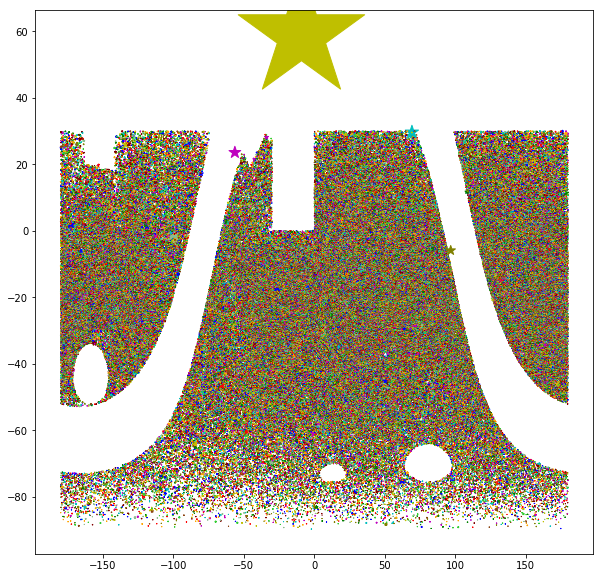

In [95]:
ra_gleam = GLEAM_seek['point_sources_RA']
dec_gleam = GLEAM_seek['point_sources_DEC']
imag_gleam = GLEAM_seek['point_sources_I']
c_rand = np.random.choice(colors, len(ra_gleam[0]))
plt.scatter(ra_gleam, dec_gleam, color = c_rand , marker = '*', s = imag_gleam);

Below we try to re-write the matching function to use GLEAM

Link to documentation: https://docs.astropy.org/en/stable/coordinates/matchsep.html

In [91]:
def match_to_gleam(directory, GLEAM_path):
    """
    Matches all the .sav files in a given directory with GLEAM
    
    directory is an absolute path to the data
    
    GLEAM_path is an absolute path to a .sav GLEAM file
    
    """
    #Create paths to all the .sav files in the specified directory
    paths = glob.glob(directory + '*.sav')
    
    #Load the GLEAM data
    GLEAM_data = clst.collector(GLEAM_path)
    ra_gleam = np.array(GLEAM_seek['point_sources_RA'][0])
    dec_gleam = np.array(GLEAM_seek['point_sources_DEC'][0])
    imag_gleam = np.array(GLEAM_seek['point_sources_I'][0])
    
    #Create a Pandas Data Frame with the RA, DEC, and GLEAM Magnitudes
    n=0
    df = pd.DataFrame({'RA': ra_gleam,'Mag GLEAM': imag_gleam,  'DEC' : dec_gleam})
    
    #Look at each path in the directory
    #WARNING: 2 files takes 15-20 minutes to load. DO NOT change the indecies unless 
    #you are prepared to wait a while. There are over 300k stars in GLEAM
    for path in paths[0:2]:
        
        #Collect the data for each path
        n = n + 1
        data = clst.collector(path)
        data_seek = clst.seeker(data)
        
        ra = np.array(data_seek['point_sources_RA'][0])
        dec = np.array(data_seek['point_sources_DEC'][0])
        imag = np.array(data_seek['point_sources_I'][0])


        #Match this path with the GLEAM catalog
        #idx: an array of indices corresponding to matches
        #d2d: the two dimensional distances between these matches
        #d3d: three dimensional distances between matches. This array is blank becasue we do 
        #not have 3 dimensional data, but the match_to_catalog_sky function requires it anyway
        catalog = SkyCoord(ra=ra*u.deg, dec=dec*u.deg)  
        c = SkyCoord(ra=ra_gleam*u.deg, dec=dec_gleam*u.deg)  
        idx, d2d, d3d = c.match_to_catalog_sky(catalog)  
        
        
        #Possible source of error because the below statement is worded a little strange
        #Only return matches within one degree 
        mags = []
        imags = imag[idx]
        nums = np.arange(0, len(idx))
        for num in nums:
            if d2d[num] < (1*u.deg):
                mags.append(imags[num])
            else: 
                mags.append(0)
                
        #Add a new column to the data frame with the information from this path      
        s_mag = pd.Series(mags)
        s_dist = pd.Series(d2d)
        df['Mag {}'.format(n)] = s_mag
        df['Distance {}'.format(n)] = s_dist
        
        
        #s_mag = pd.Series(imag[idx])
        #s_dist = pd.Series(d2d)
        #df['Mag {}'.format(n)] = s_mag
        #df['Distance {}'.format(n)] = s_dist
        
        
    return df

In [92]:
GLEAM_path = '/home/kelcey/hera/Washington/GLEAM_v2_plus_rlb2019.sav'
directory = '/home/kelcey/hera/Washington/uwashchamp2019/source_array_data/'
table = match_to_gleam(directory, GLEAM_path)
table

DEC         Mag 0          RA  Mag 1  Distance 1     Mag 2  \
0      -89.687309      0.303373   -2.085632    0.0   23.563060  0.000000   
1      -89.213310      0.227618  -21.663757    0.0   23.680776  0.000000   
2      -89.155968      0.451251  -11.600952    0.0   23.533056  0.000000   
3      -88.750610      1.528642  -14.703156    0.0   23.530511  0.000000   
4      -88.740990      0.290795  -41.215271    0.0   24.102623  0.000000   
5      -88.825325      0.315769  -10.407288    0.0   23.451766  0.000000   
6      -88.430840      0.253299   -8.097626    0.0   23.318865  0.000000   
7      -88.290367      0.113284  -24.161621    0.0   23.766096  0.000000   
8      -88.139534      0.416708  -15.071472    0.0   23.482828  0.000000   
9      -88.058319      0.426634   -0.703857    0.0   23.000990  0.000000   
10     -88.083977      0.364179   -5.521973    0.0   23.163719  0.000000   
11     -87.923241      0.101682  -33.995789    0.0   24.146391  0.000000   
12     -87.785049      0.358127  -27.142395    0.0   23.922649  0.000000   
13     -87.633049      0.037855  -29.049164    0.0   24.022700  0.000000   
14     -87.679802      0.161100  -29.197479    0.0   24.020107  0.000000   
15     -87.602364      0.731250  -14.716095    0.0   23.431359  0.000000   
16     -87.412720      0.220024  -32.181641    0.0   24.201864  0.000000   
17     -87.522263      0.248584  -13.101196    0.0   23.356773  0.000000   
18     -87.461739      0.409115  -19.270203    0.0   23.624405  0.000000   
19     -87.319031      0.047056  -35.676086    0.0   24.381919  0.000000   
20     -87.474701      0.142159  -10.594269    0.0   23.242806  0.000000   
21     -87.453537      0.088043  -21.855133    0.0   23.739308  0.000000   
22     -87.364082      0.139261   -2.571747    0.0   22.867147  0.000000   
23     -87.191841      0.013502  -35.034760    0.0   24.390841  0.000000   
24     -87.250534      0.175932  -27.447723    0.0   24.019795  0.000000   
25     -87.179291      0.229824  -32.254242    0.0   24.263050  0.000000   
26     -87.095757      0.252373   -7.220490    0.0   23.027030  0.000000   
27     -87.179016      0.525889  -14.238434    0.0   23.384534  0.000000   
28     -87.079651      0.501711   -2.520325    0.0   22.790442  0.000000   
29     -86.904198      0.182995  -28.588501    0.0   24.141439  0.000000   
...           ...           ...         ...    ...         ...       ...   
307428  29.971245      1.519213  -93.646545    0.0  138.437765  0.000000   
307429  29.717297      0.295790 -108.474823    0.0  143.135377  0.000000   
307430  29.794407      0.720863 -100.027863    0.0  140.855082  0.000000   
307431  29.783333      5.447074 -103.970123    0.0  142.311192  0.000000   
307432  29.811129      1.875155 -101.616821    0.0  141.473663  0.000000   
307433  29.843433      0.404300 -111.417267    0.0  143.416522  0.000000   
307434   8.914019      1.918836  -95.944092    0.0  120.132782  0.000000   
307435   8.817615      0.628462  -97.751587    0.0  120.614887  0.000000   
307436   8.677989      0.307917 -108.004089    0.0  122.225288  0.000000   
307437   8.786252      0.218762 -111.738876    0.0  122.420873  0.000000   
307438   9.102604      0.264672 -117.386383    0.0  122.028110  0.000000   
307439   9.153099      0.223509  -92.058685    0.0  118.963499  0.000000   
307440   8.877378      0.329359  -96.172974    0.0  120.171928  0.000000   
307441   9.095340      0.260390 -117.064209    0.0  122.080506  0.000000   
307442  10.536336      0.909025 -130.350067    0.0  120.089458  0.000000   
307443   8.665218      0.087867 -106.050400    0.0  121.974079  0.000000   
307444   8.691673      1.164105 -106.580627    0.0  122.068055  0.000000   
307445   8.720312      0.391966 -108.885666    0.0  122.318203  0.000000   
307446  21.503145      4.256060  -32.058319    0.0   95.991073  0.000000   
307447   8.709949      1.582839 -102.747498    0.0  121.512777  0.000000   
307448  11.380795      0.246387 -135.755478    0.0  118.554485

Some of these data points appear to be a little off on first glance. The first row shows matching distances of 23 and 59 degrees, a huge distance. It is clear what is going on when the below plot is considered. These data sources only cover small fractions of what GLEAM covers and are very far from most of the sources in the GLEAM data. This is why the matching distance cut off is so important. 

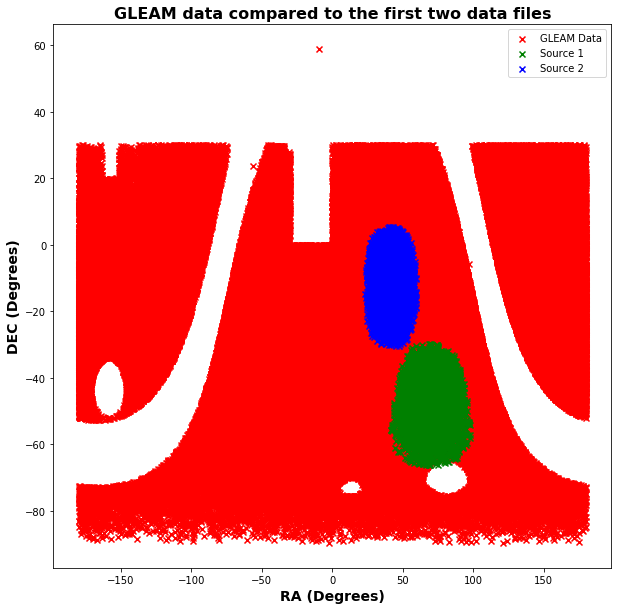

In [93]:
paths = glob.glob(directory + '*.sav')
data0 = clst.collector(paths[0])
data_seek0 = clst.seeker(data0)

data1 = clst.collector(paths[1])
data_seek1 = clst.seeker(data1)

plt.scatter(ra_gleam, dec_gleam, color = 'r', marker = 'x', label = 'GLEAM Data')
plt.scatter(np.array(data_seek0['point_sources_RA'][0]), np.array(data_seek0['point_sources_DEC'][0]), 
            color = 'g', marker = 'x', label = 'Source 1')
plt.scatter(np.array(data_seek1['point_sources_RA'][0]), np.array(data_seek1['point_sources_DEC'][0]), 
            color = 'b', marker = 'x', label = 'Source 2')
plt.xlabel('RA (Degrees)')
plt.ylabel('DEC (Degrees)')
plt.title('GLEAM data compared to the first two data files')
plt.legend();

Looking at a closer portion of the data

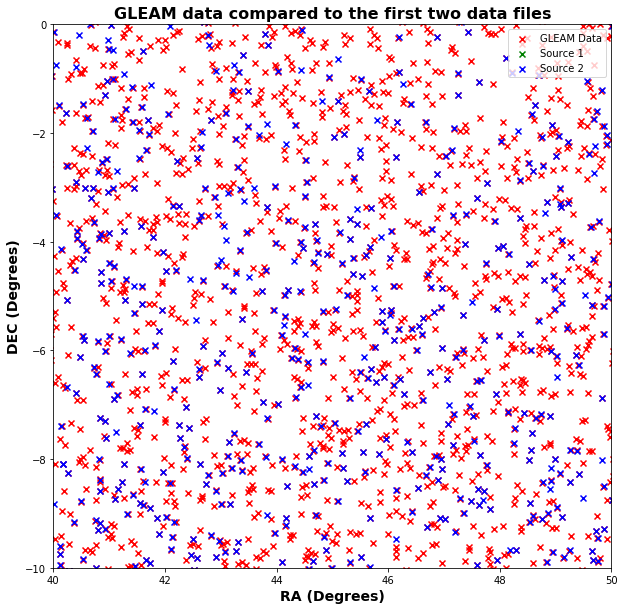

In [109]:
plt.scatter(ra_gleam, dec_gleam, color = 'r', marker = 'x', label = 'GLEAM Data')
plt.scatter(np.array(data_seek0['point_sources_RA'][0]), np.array(data_seek0['point_sources_DEC'][0]), 
            color = 'g', marker = 'x', label = 'Source 1')
plt.scatter(np.array(data_seek1['point_sources_RA'][0]), np.array(data_seek1['point_sources_DEC'][0]), 
            color = 'b', marker = 'x', label = 'Source 2')
plt.ylim(-10, 0)
plt.xlim(40, 50)

plt.xlabel('RA (Degrees)')
plt.ylabel('DEC (Degrees)')
plt.title('GLEAM data compared to the first two data files')
plt.legend();

Below is a cell that can be run to display the non-zero entries in the Pandas DataFrame.

In [107]:
matches = np.nonzero(table['Mag 1'])
matches[0]

array([ 49013,  49102,  49221, ..., 101851, 101852, 101853])

It is important to determine what would be the best cut off for the matching distance arrays. Too small a cut off and there will be no matches. Too large a cut off and the computer will match GLEAM data out of range for a data set with the closest possible point.

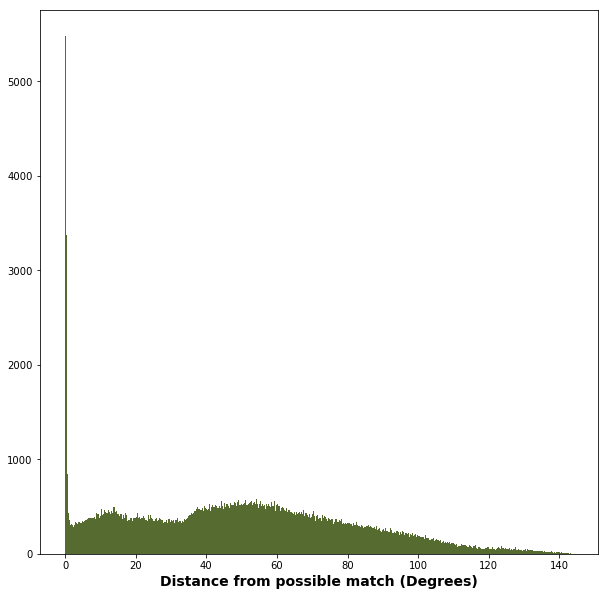

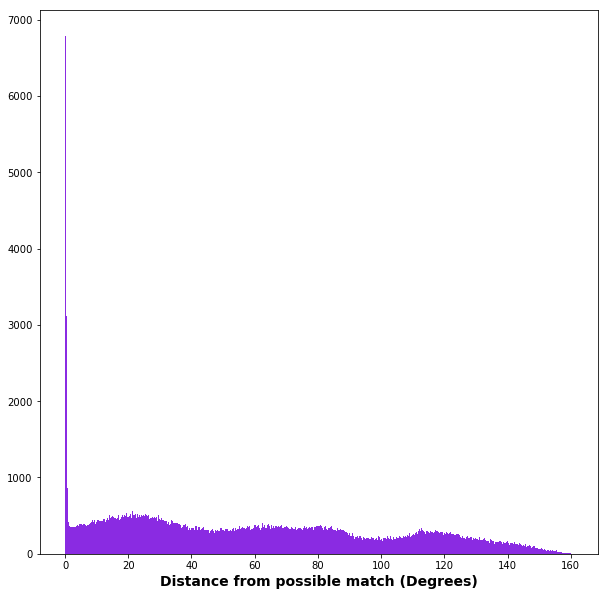

In [124]:
dists1 = table['Distance 1']
dists2 =  table['Distance 2']

plt.figure()
plt.hist(dists1, bins = 1000, color = 'darkolivegreen', label = 'Matching Distances for Data Set 1')
plt.xlabel('Distance from possible match (Degrees)')

plt.figure()
plt.hist(dists2, bins = 1000, color = 'blueviolet', label = 'Matching Distances for Data Set 2')
plt.xlabel('Distance from possible match (Degrees)');

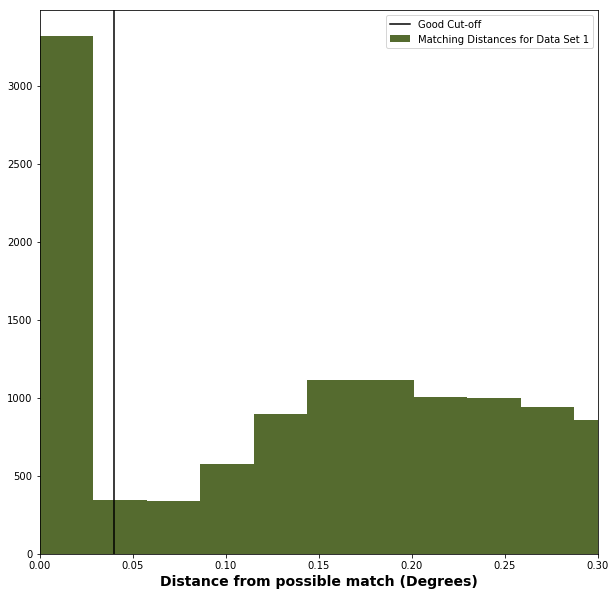

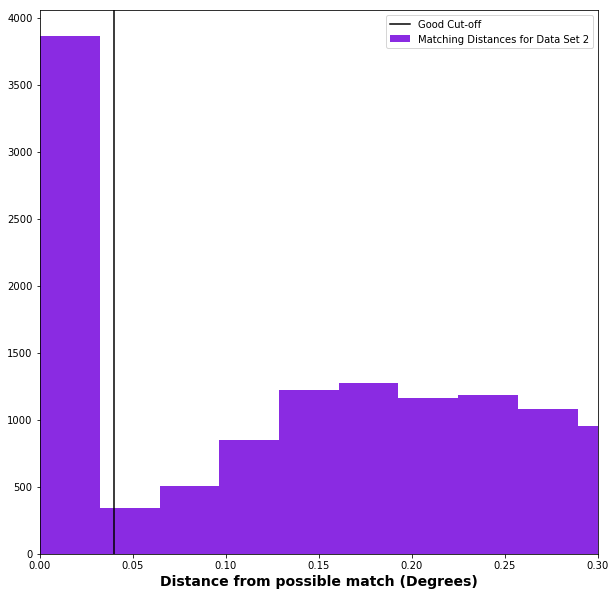

In [123]:
dists1 = table['Distance 1']
dists2 =  table['Distance 2']

plt.figure()
plt.hist(dists1, bins = 5000, color = 'darkolivegreen', label = 'Matching Distances for Data Set 1')
plt.xlabel('Distance from possible match (Degrees)')
plt.xlim(0, .3)
plt.axvline(0.04, color = 'k', label = 'Good Cut-off')
plt.legend()

plt.figure()
plt.hist(dists2, bins = 5000, color = 'blueviolet', label = 'Matching Distances for Data Set 2')
plt.xlabel('Distance from possible match (Degrees)')
plt.axvline(0.04, color = 'k', label = 'Good Cut-off')
plt.xlim(0, .3)
plt.legend();